In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む (インデックスを読み込まない)
csv_file = 'average_data.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file, index_col=False, header=0)  # index_colをFalseに設定

# Unnamed: 0の列を削除
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])  # 不要な列を削除

print(df)

# データを数値型に変換し、無効な値をNaNに変換
df = df.apply(pd.to_numeric, errors='coerce')
print(df)

           0          15          30          45          60          75  \
0  92.966102  127.627119  126.101695  124.364407  117.627119  110.762712   
1  72.754237  101.101695  102.330508  101.567797   96.144068   89.915254   
2  46.864407   74.067797   74.618644   73.940678   72.457627   70.169492   
3  31.483051   49.872881   53.983051   55.296610   55.042373   55.423729   
4  12.584746   19.491525   33.813559   44.618644   48.474576   47.881356   
5   5.169492    9.618644   22.881356   33.474576   38.432203   38.347458   
6   0.000000    0.000000    0.000000    0.000000    9.110169   19.152542   
7   3.177966    9.279661   10.000000   12.203390   19.364407   23.516949   

          90        105        120        135  ...        570        585  \
0  99.915254  94.491525  91.906780  90.635593  ...  88.601695  85.211864   
1  82.796610  77.966102  75.127119  70.550847  ...  68.177966  65.593220   
2  66.906780  65.677966  63.898305  61.991525  ...  56.906780  55.211864   
3  53.81355

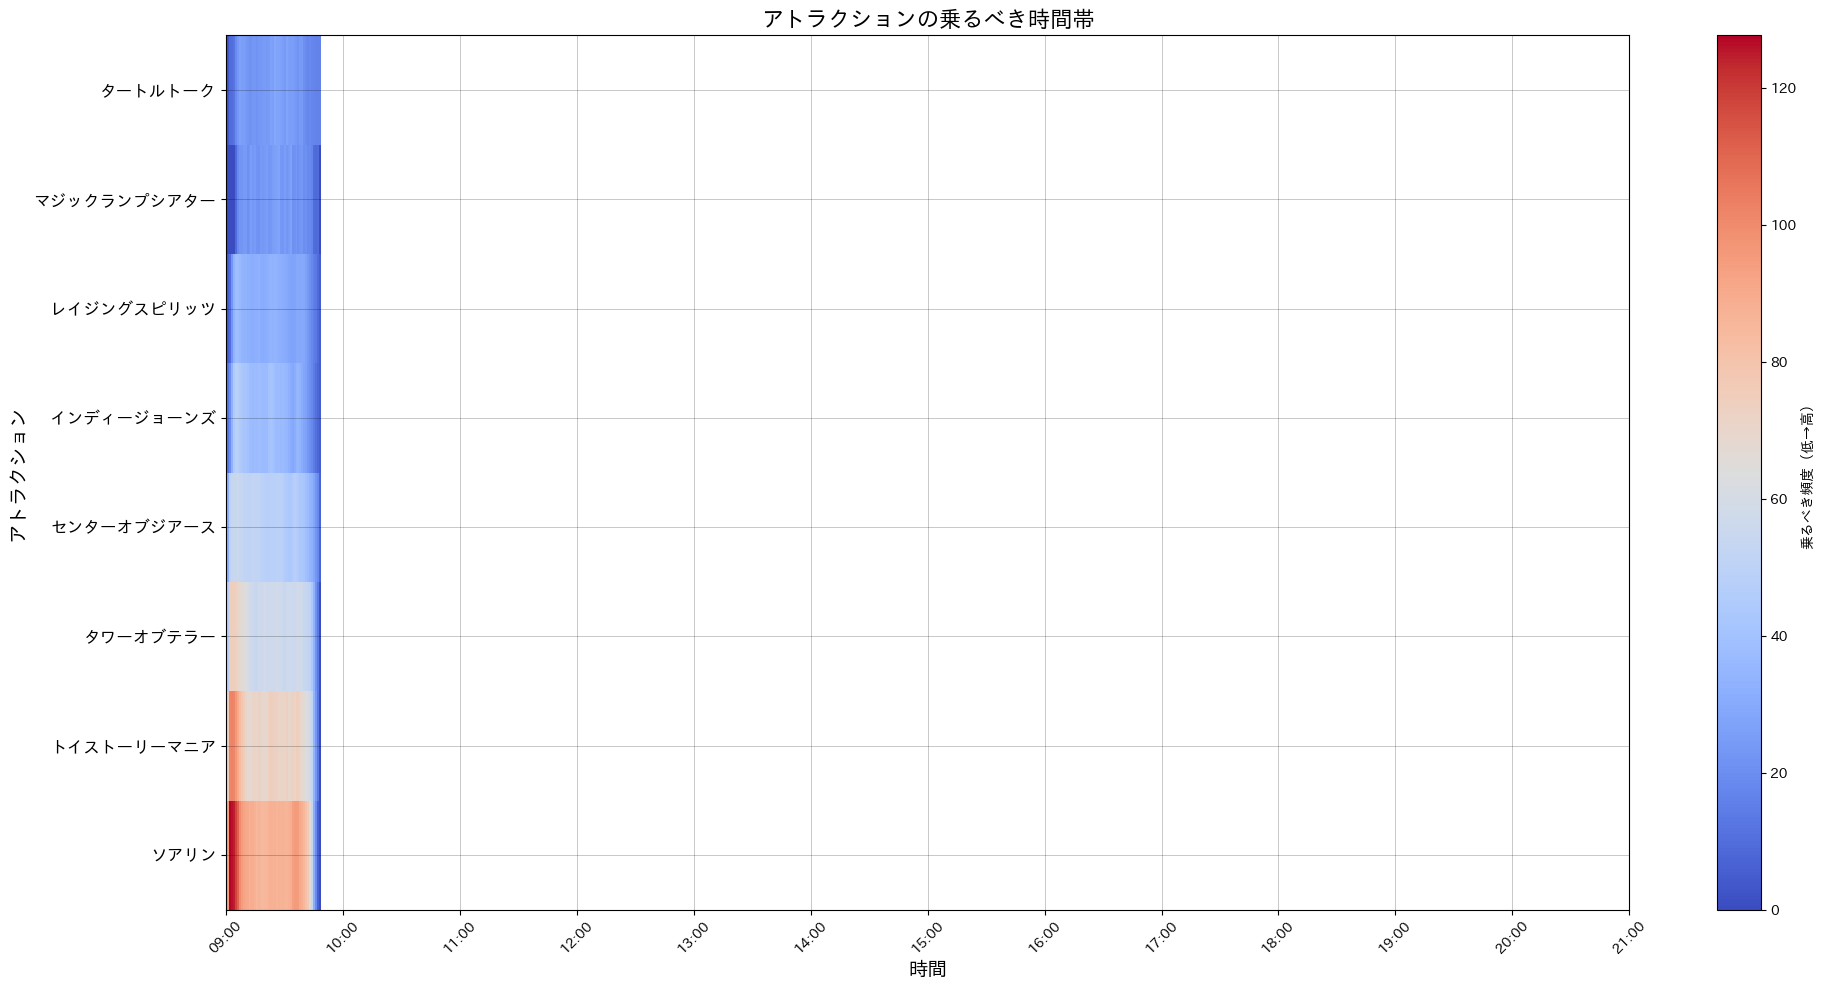

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'average_data.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# データを数値型に変換し、無効な値をNaNに変換
df = df.apply(pd.to_numeric, errors='coerce')

# ヒートマップデータの初期化
heatmap_data = df.values  # データフレームの値を取得

# プロットの準備
plt.figure(figsize=(20, 10))

# ヒートマップを表示（色分けにseismicカラーマップを使用）
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', interpolation='nearest', alpha=1.0)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
attractions = [
    'ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 
    'センターオブジアース', 'インディージョーンズ', 
    'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク'
]
plt.yticks(np.arange(len(attractions)), attractions, fontsize=12)

# x軸ラベル設定 (9:00~21:00の15分ごとに設定)
x_ticks = range(0, 721, 60)  # 60分ごと
x_labels = [f"{(t // 60) + 9:02}:{(t % 60):02}" for t in x_ticks]  # 9:00から始まる時間
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=10)

# x軸の範囲を設定 (9:00から21:00)
plt.xlim(0, 720)

# y軸の範囲を設定
plt.ylim(-0.5, len(attractions) - 0.5)

# グラフの設定
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの乗るべき時間帯", fontsize=16)

# カラーバーの追加
cbar = plt.colorbar(cax, label='乗るべき頻度（低→高）')
cbar.ax.tick_params(labelsize=10)

# 図を表示
plt.tight_layout()
plt.show()


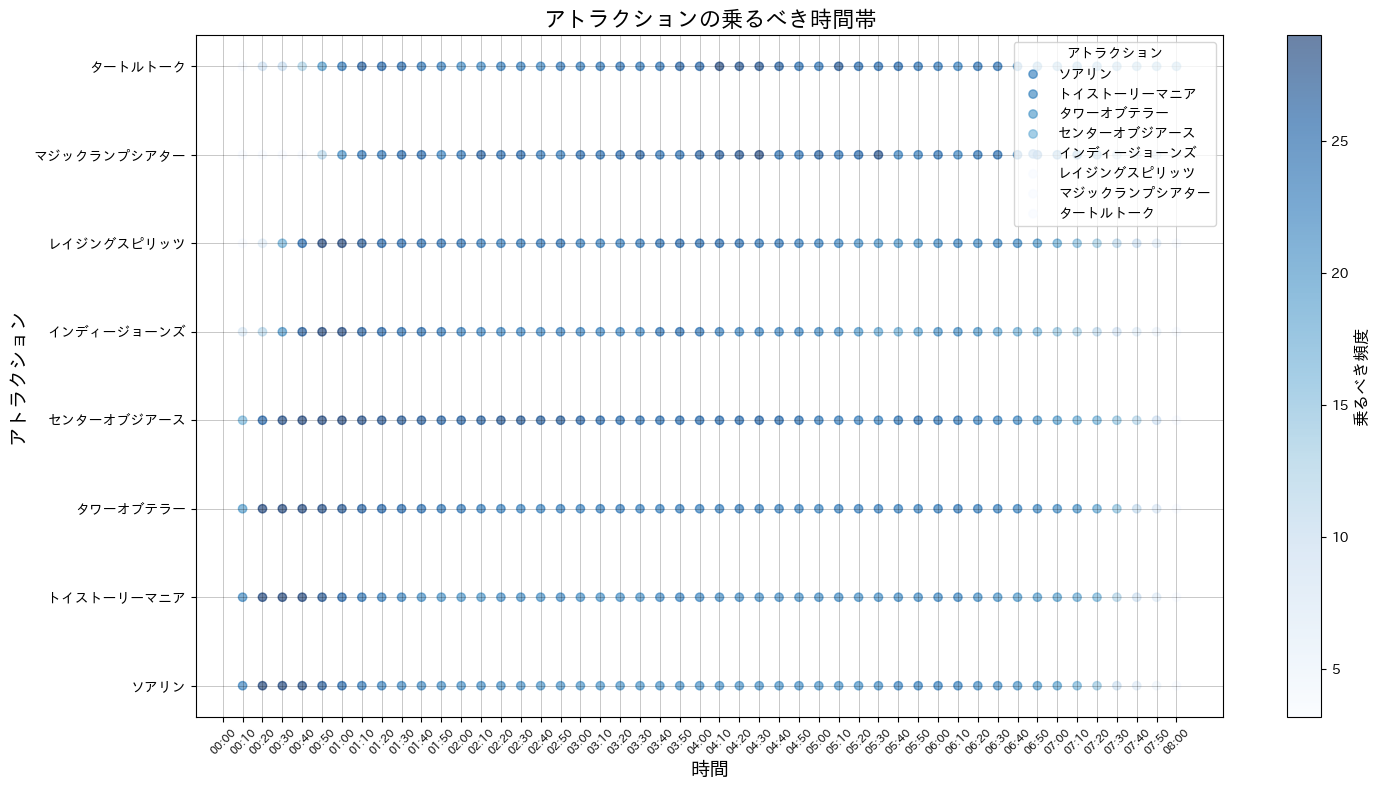

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'average_data.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# データを数値型に変換し、無効な値をNaNに変換
df = df.apply(pd.to_numeric, errors='coerce')

# アトラクション名の辞書
attractions = {
    0: 'ソアリン',
    1: 'トイストーリーマニア',
    2: 'タワーオブテラー',
    3: 'センターオブジアース',
    4: 'インディージョーンズ',
    5: 'レイジングスピリッツ',
    6: 'マジックランプシアター',
    7: 'タートルトーク'
}

# 散布図用のプロット設定
plt.figure(figsize=(15, 8))

# 各アトラクションの時間帯と頻度に基づいて散布図を作成
for i, attraction in enumerate(attractions.values()):
    # アトラクションごとの時間帯と頻度を取得
    y = np.repeat(i, df.shape[1])  # y座標はアトラクションのインデックス
    x = np.arange(df.shape[1])  # x座標は時間帯のインデックス
    frequency = df.iloc[i].values  # 乗るべき頻度データを取得
    
    # NaNを除外
    valid_mask = ~np.isnan(frequency)

    # 色の設定：頻度に基づく（頻度が高いほど濃い色）
    colors = frequency[valid_mask]
    
    scatter = plt.scatter(x[valid_mask], y[valid_mask], c=colors, 
                          cmap='Blues',  # 色のカラーマップを指定
                          alpha=0.6, 
                          label=attraction)  # アトラクションごとにラベルを設定

# カラーバーの追加
cbar = plt.colorbar(scatter)
cbar.set_label('乗るべき頻度', fontsize=12)

# x軸ラベル設定 (列数に基づく)
x_ticks = np.arange(df.shape[1])  # 列数に基づくx軸の範囲
x_labels = [f"{t // 60:02}:{t % 60:02}" for t in range(0, df.shape[1] * 10, 10)]  # 10分ごと
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
plt.yticks(np.arange(len(attractions)), list(attractions.values()))

# グラフの設定
plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの乗るべき時間帯", fontsize=16)
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

# 凡例の表示
plt.legend(title='アトラクション', loc='upper right')

# 図を表示
plt.tight_layout()
plt.show()


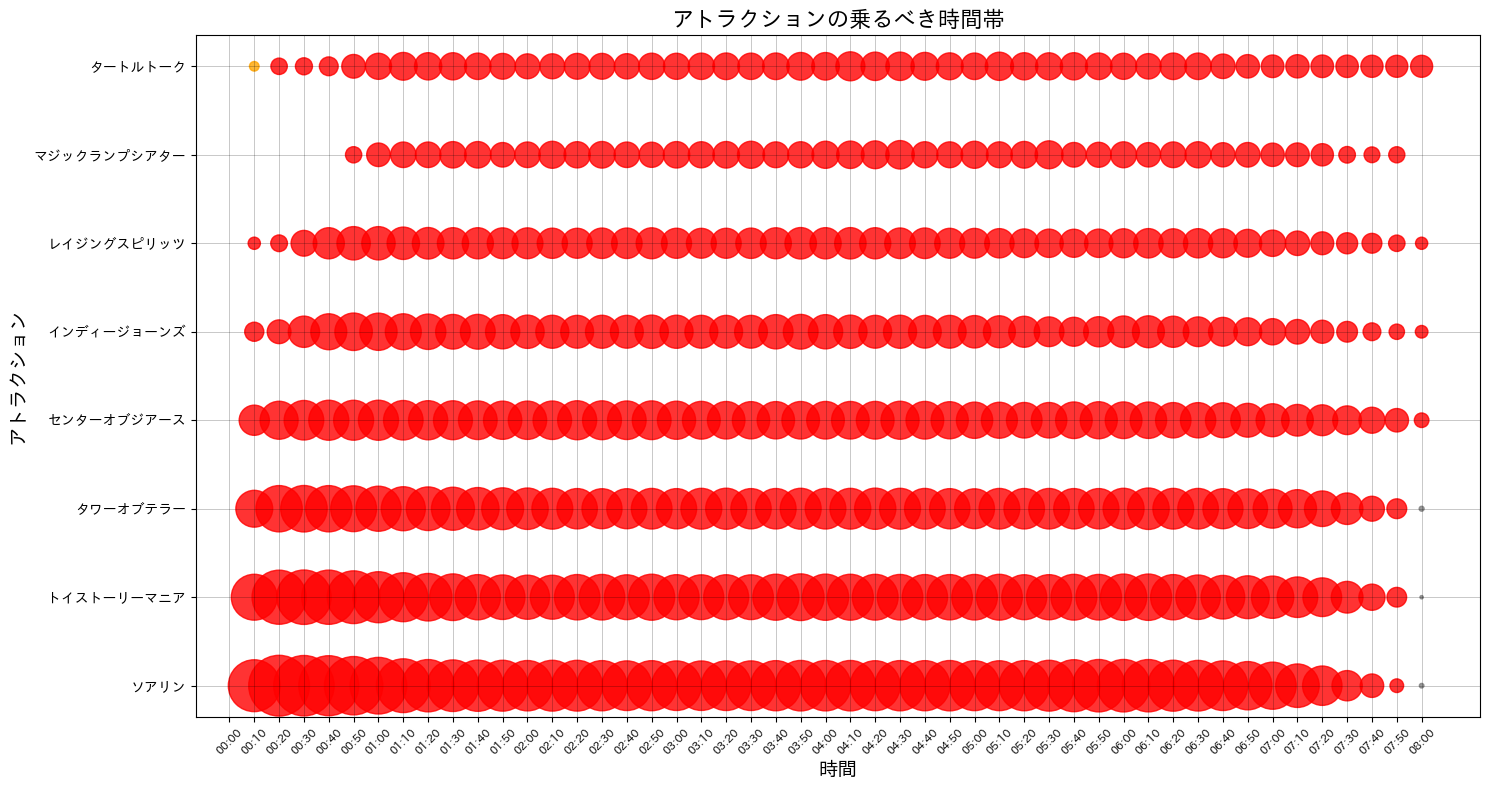

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'average_data.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# データを数値型に変換し、無効な値をNaNに変換
df = df.apply(pd.to_numeric, errors='coerce')

# アトラクション名の辞書
attractions = {
    0: 'ソアリン',
    1: 'トイストーリーマニア',
    2: 'タワーオブテラー',
    3: 'センターオブジアース',
    4: 'インディージョーンズ',
    5: 'レイジングスピリッツ',
    6: 'マジックランプシアター',
    7: 'タートルトーク'
}

# 散布図用のプロット設定
plt.figure(figsize=(15, 8))

# 各アトラクションの時間帯と頻度に基づいて散布図を作成
for i, attraction in enumerate(attractions.values()):
    # アトラクションごとの時間帯と頻度を取得
    y = np.repeat(i, df.shape[1])  # y座標はアトラクションのインデックス
    x = np.arange(df.shape[1])  # x座標は時間帯のインデックス
    frequency = df.iloc[i].values  # 乗るべき頻度データを取得
    
    # NaNを除外
    valid_mask = ~np.isnan(frequency)

    # 各頻度をグループ分け（ここでは5段階に分ける例）
    color_map = {
        0: 'grey',      # 無視
        1: 'lightgreen',# 低
        2: 'yellow',    # 中
        3: 'orange',    # 高
        4: 'red'        # 非常に高
    }
    
    # 精度を色にマッピング（ここで0-4に制限）
    clipped_frequency = np.clip(frequency[valid_mask], 0, 4)  # 0から4の範囲にクリップ
    colors = [color_map[int(val)] for val in clipped_frequency]

    # サイズを頻度に基づいて設定（ここでは頻度をそのまま使い、適宜スケーリング）
    sizes = [val * 15 for val in frequency[valid_mask]]  # サイズを頻度の15倍に設定（調整済み）

    plt.scatter(x[valid_mask], y[valid_mask], c=colors, s=sizes, alpha=0.8, label=attraction)  # 各アトラクションごとにラベルを設定

# x軸ラベル設定 (列数に基づく)
x_ticks = np.arange(df.shape[1])  # 列数に基づくx軸の範囲
x_labels = [f"{t // 60:02}:{t % 60:02}" for t in range(0, df.shape[1] * 10, 10)]  # 10分ごと
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
plt.yticks(np.arange(len(attractions)), list(attractions.values()))

# グラフの設定
plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの乗るべき時間帯", fontsize=16)
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

# 図を表示
plt.tight_layout()
plt.show()


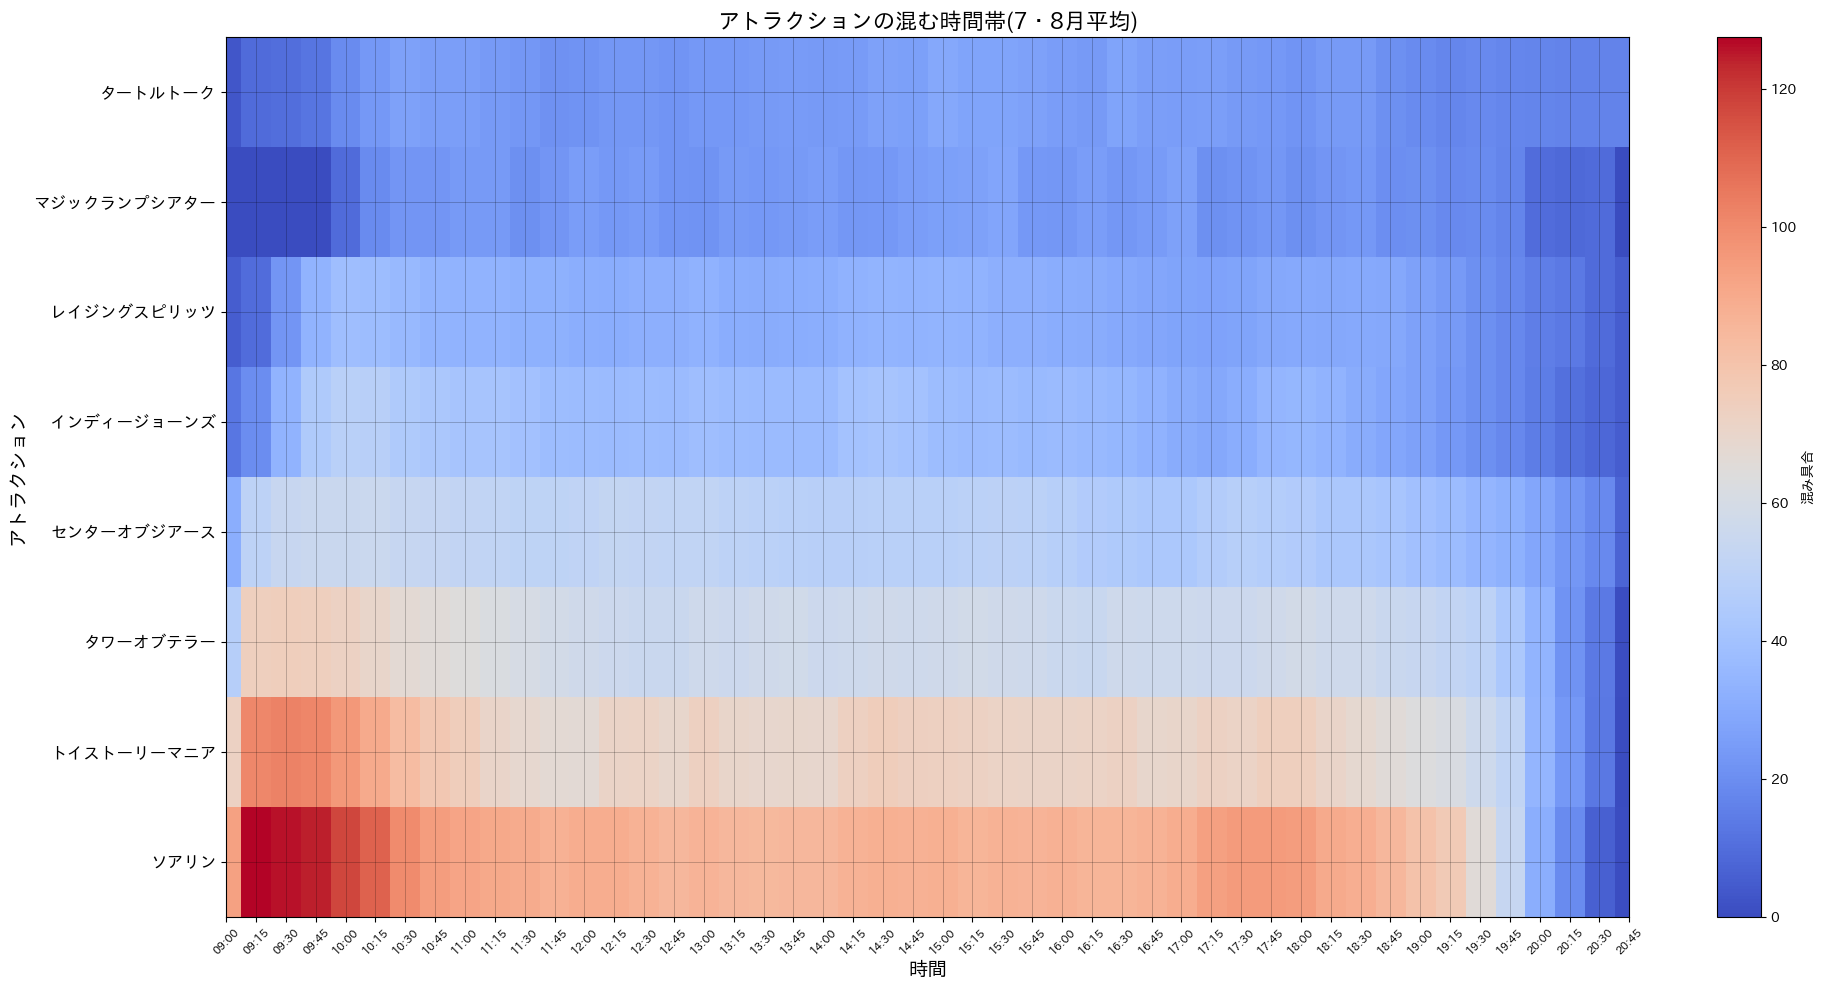

In [58]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'average_data.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# 不要な列を削除する
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# データを数値に変換
df = df.apply(pd.to_numeric, errors='coerce')

# ヒートマップデータの初期化
heatmap_data = df.values  # データフレームの値を取得

# プロットの準備
plt.figure(figsize=(20, 10))  # 図全体のサイズを大きく設定（幅20、高さ10）

# ヒートマップを表示
norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=1.0)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
attractions = ['ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 'センターオブジアース',
               'インディージョーンズ', 'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク']
plt.yticks(np.arange(len(attractions)), attractions, fontsize=12)  # フォントサイズを調整

# x軸ラベル設定 (9:00~21:00の15分ごとに設定)
x_ticks = np.arange(len(df.columns))  # 各列のインデックスをx軸ラベルとして使用
x_labels = [f"{(int(t) // 60) + 9:02}:{(int(t) % 60):02}" for t in df.columns]  # 9:00から始まる時間
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# x軸の範囲を設定 (9:00から21:00)
plt.xlim(0, len(x_ticks) - 1)

# y軸の範囲を設定
plt.ylim(-0.5, len(attractions) - 0.5)

# グラフの設定
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの混む時間帯(7・8月平均)", fontsize=16)

# カラーバーの追加
cbar = plt.colorbar(cax, label='混み具合')
cbar.ax.tick_params(labelsize=10)

# 図を表示
plt.tight_layout()
plt.show()

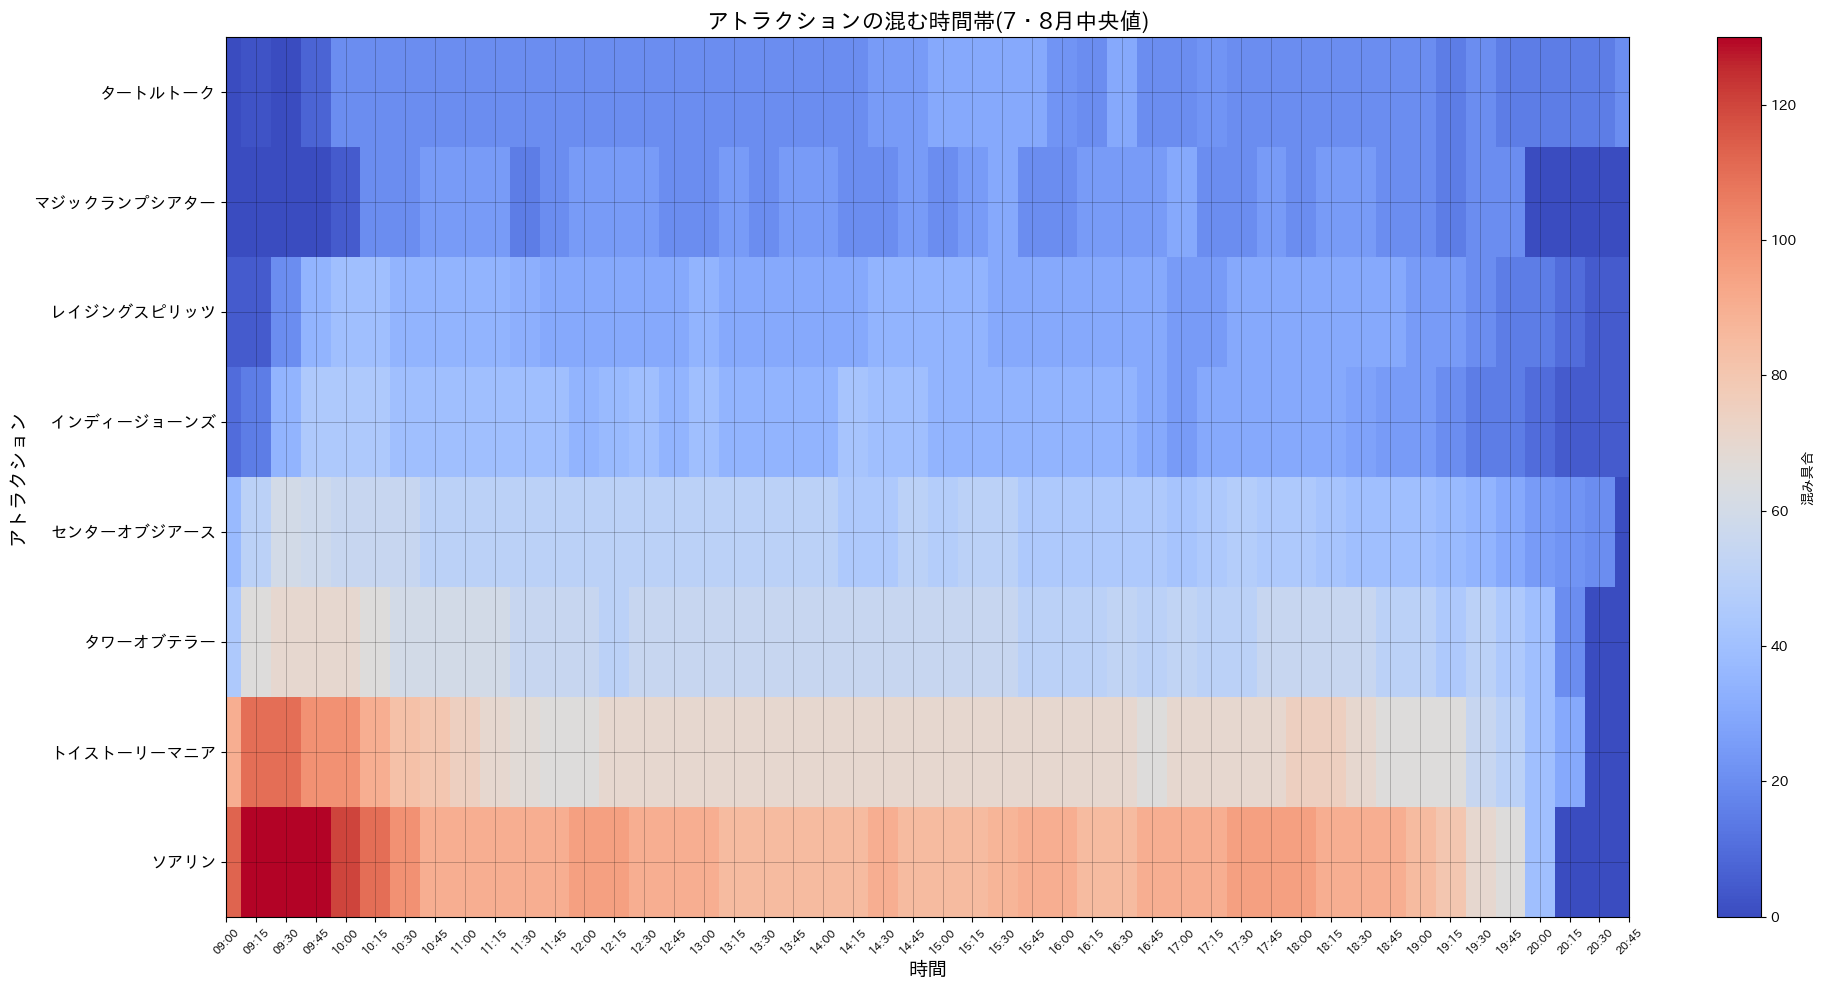

In [61]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'median_data.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

#print(df)

# 不要な列を削除する
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#print(df)


# データを数値に変換
df = df.apply(pd.to_numeric, errors='coerce')

# ヒートマップデータの初期化
heatmap_data = df.values  # データフレームの値を取得

# プロットの準備
plt.figure(figsize=(20, 10))  # 図全体のサイズを大きく設定（幅20、高さ10）

# ヒートマップを表示
norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=1.0)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
attractions = ['ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 'センターオブジアース',
               'インディージョーンズ', 'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク']
plt.yticks(np.arange(len(attractions)), attractions, fontsize=12)  # フォントサイズを調整

# x軸ラベル設定 (9:00~21:00の15分ごとに設定)
x_ticks = np.arange(len(df.columns))  # 各列のインデックスをx軸ラベルとして使用
x_labels = [f"{(int(t) // 60) + 9:02}:{(int(t) % 60):02}" for t in df.columns]  # 9:00から始まる時間
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# x軸の範囲を設定 (9:00から21:00)
plt.xlim(0, len(x_ticks) - 1)

# y軸の範囲を設定
plt.ylim(-0.5, len(attractions) - 0.5)

# グラフの設定
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの混む時間帯(7・8月中央値)", fontsize=16)

# カラーバーの追加
cbar = plt.colorbar(cax, label='混み具合')
cbar.ax.tick_params(labelsize=10)

# 図を表示
plt.tight_layout()
plt.show()

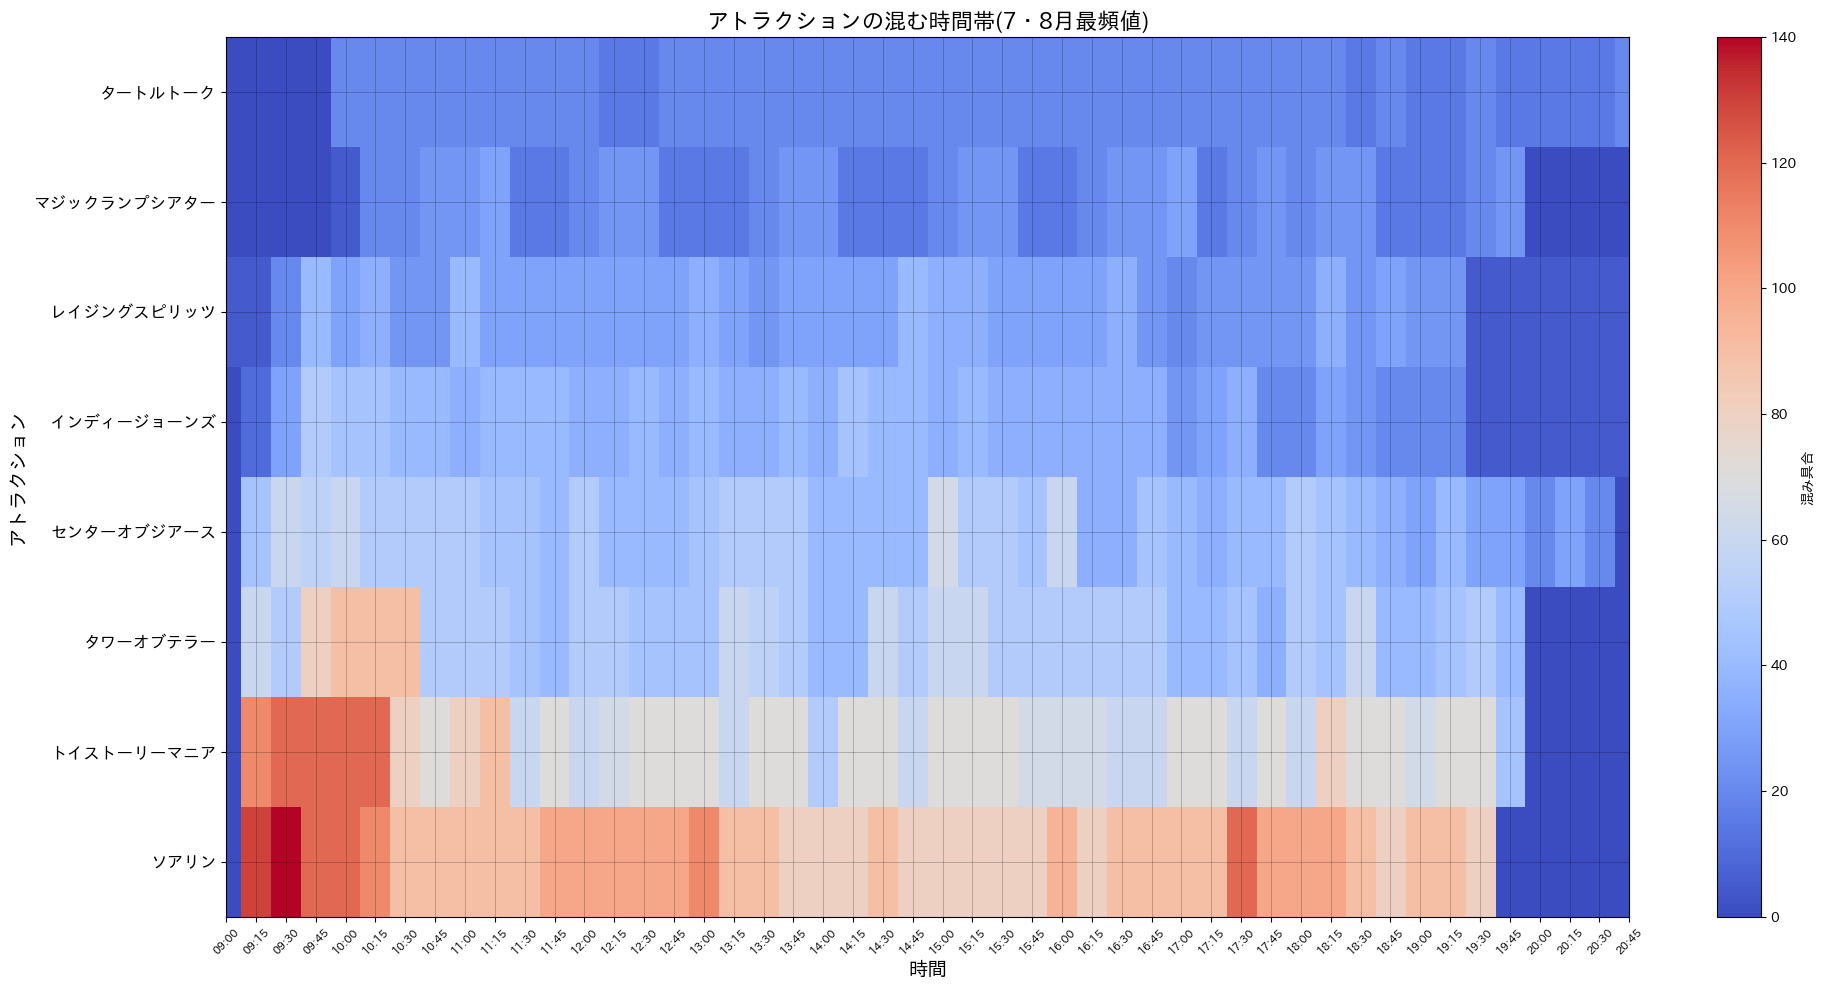

In [62]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'mode_data.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# 不要な列を削除する
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# データを数値に変換
df = df.apply(pd.to_numeric, errors='coerce')

# ヒートマップデータの初期化
heatmap_data = df.values  # データフレームの値を取得

# プロットの準備
plt.figure(figsize=(20, 10))  # 図全体のサイズを大きく設定（幅20、高さ10）

# ヒートマップを表示
norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=1.0)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
attractions = ['ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 'センターオブジアース',
               'インディージョーンズ', 'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク']
plt.yticks(np.arange(len(attractions)), attractions, fontsize=12)  # フォントサイズを調整

# x軸ラベル設定 (9:00~21:00の15分ごとに設定)
x_ticks = np.arange(len(df.columns))  # 各列のインデックスをx軸ラベルとして使用
x_labels = [f"{(int(t) // 60) + 9:02}:{(int(t) % 60):02}" for t in df.columns]  # 9:00から始まる時間
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# x軸の範囲を設定 (9:00から21:00)
plt.xlim(0, len(x_ticks) - 1)

# y軸の範囲を設定
plt.ylim(-0.5, len(attractions) - 0.5)

# グラフの設定
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの混む時間帯(7・8月最頻値)", fontsize=16)

# カラーバーの追加
cbar = plt.colorbar(cax, label='混み具合')
cbar.ax.tick_params(labelsize=10)

# 図を表示
plt.tight_layout()
plt.show()

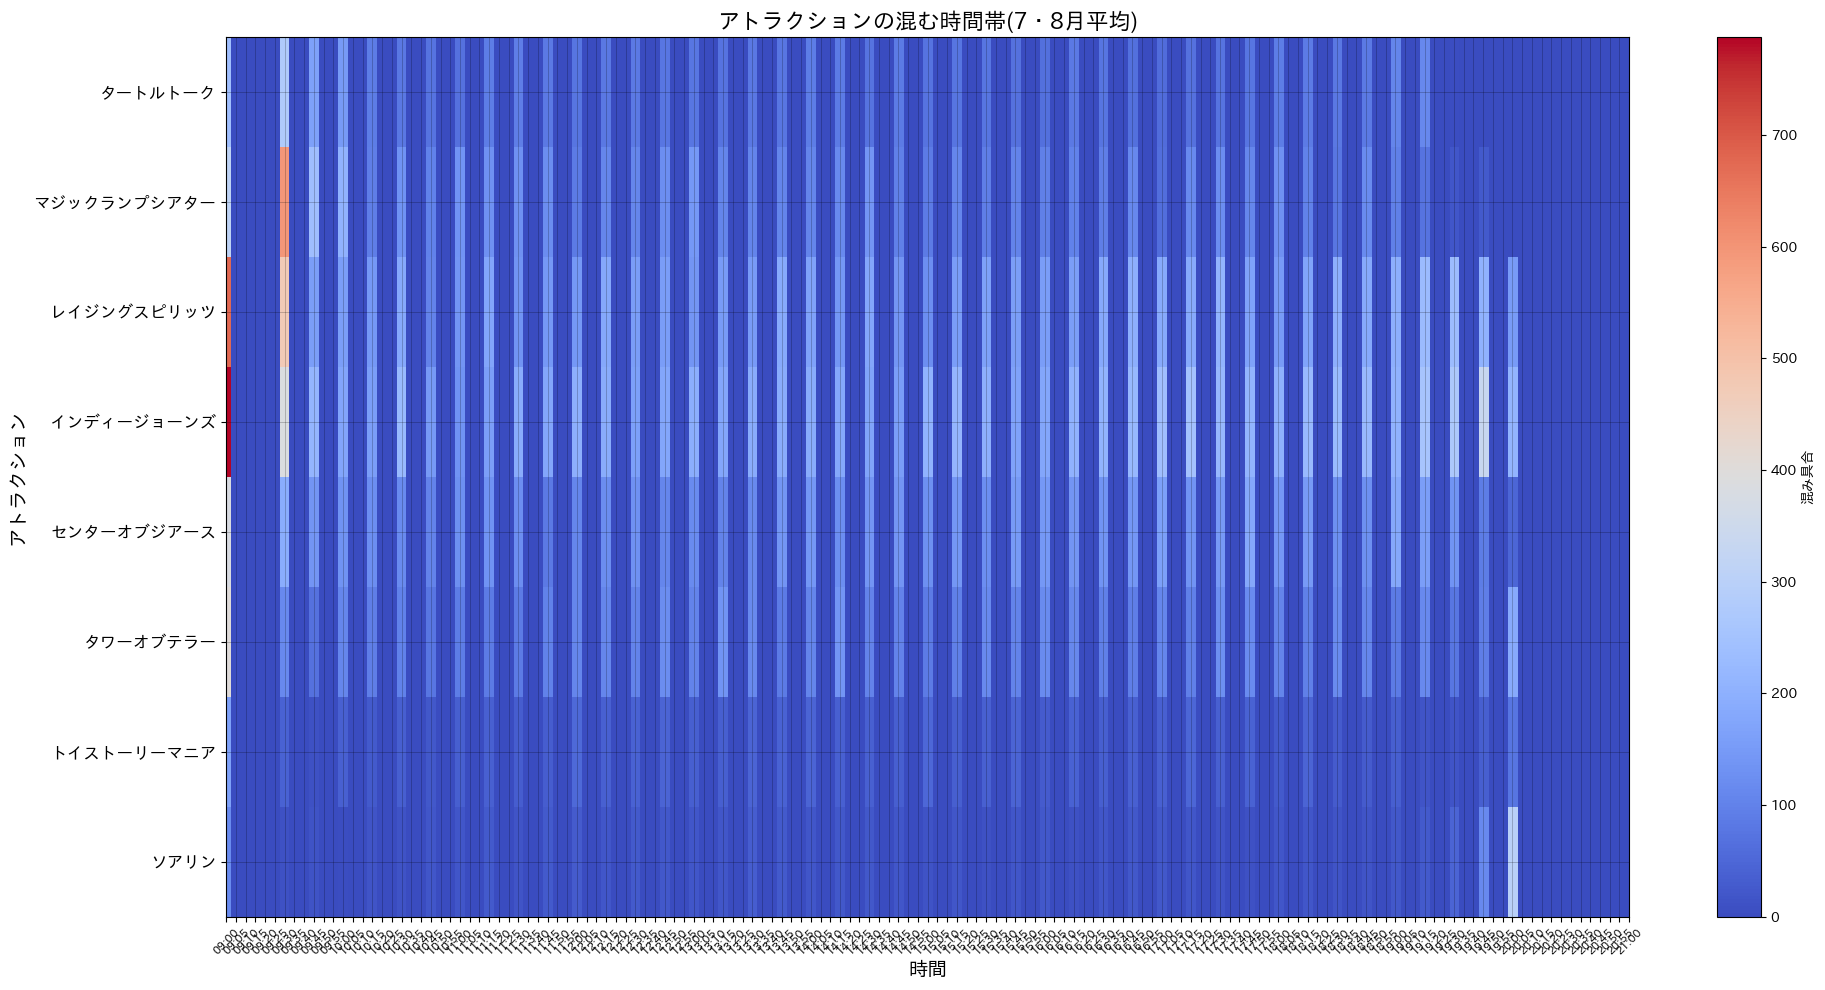

In [40]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'attraction_heatmap.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# 不要な列を削除する
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# データを数値に変換
df = df.apply(pd.to_numeric, errors='coerce')

# ヒートマップデータの初期化
heatmap_data = df.values  # データフレームの値を取得

# プロットの準備
plt.figure(figsize=(20, 10))  # 図全体のサイズを大きく設定（幅20、高さ10）

# ヒートマップを表示
norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=1.0)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
attractions = ['ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 'センターオブジアース',
               'インディージョーンズ', 'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク']
plt.yticks(np.arange(len(attractions)), attractions, fontsize=12)  # フォントサイズを調整

# x軸ラベル設定 (9:00~21:00の15分ごとに設定)
x_ticks = np.arange(len(df.columns))  # 各列のインデックスをx軸ラベルとして使用
x_labels = [f"{(int(t) // 60) + 9:02}:{(int(t) % 60):02}" for t in df.columns]  # 9:00から始まる時間
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# x軸の範囲を設定 (9:00から21:00)
plt.xlim(0, len(x_ticks) - 1)

# y軸の範囲を設定
plt.ylim(-0.5, len(attractions) - 0.5)

# グラフの設定
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの混む時間帯(7・8月平均)", fontsize=16)

# カラーバーの追加
cbar = plt.colorbar(cax, label='混み具合')
cbar.ax.tick_params(labelsize=10)

# 図を表示
plt.tight_layout()
plt.show()


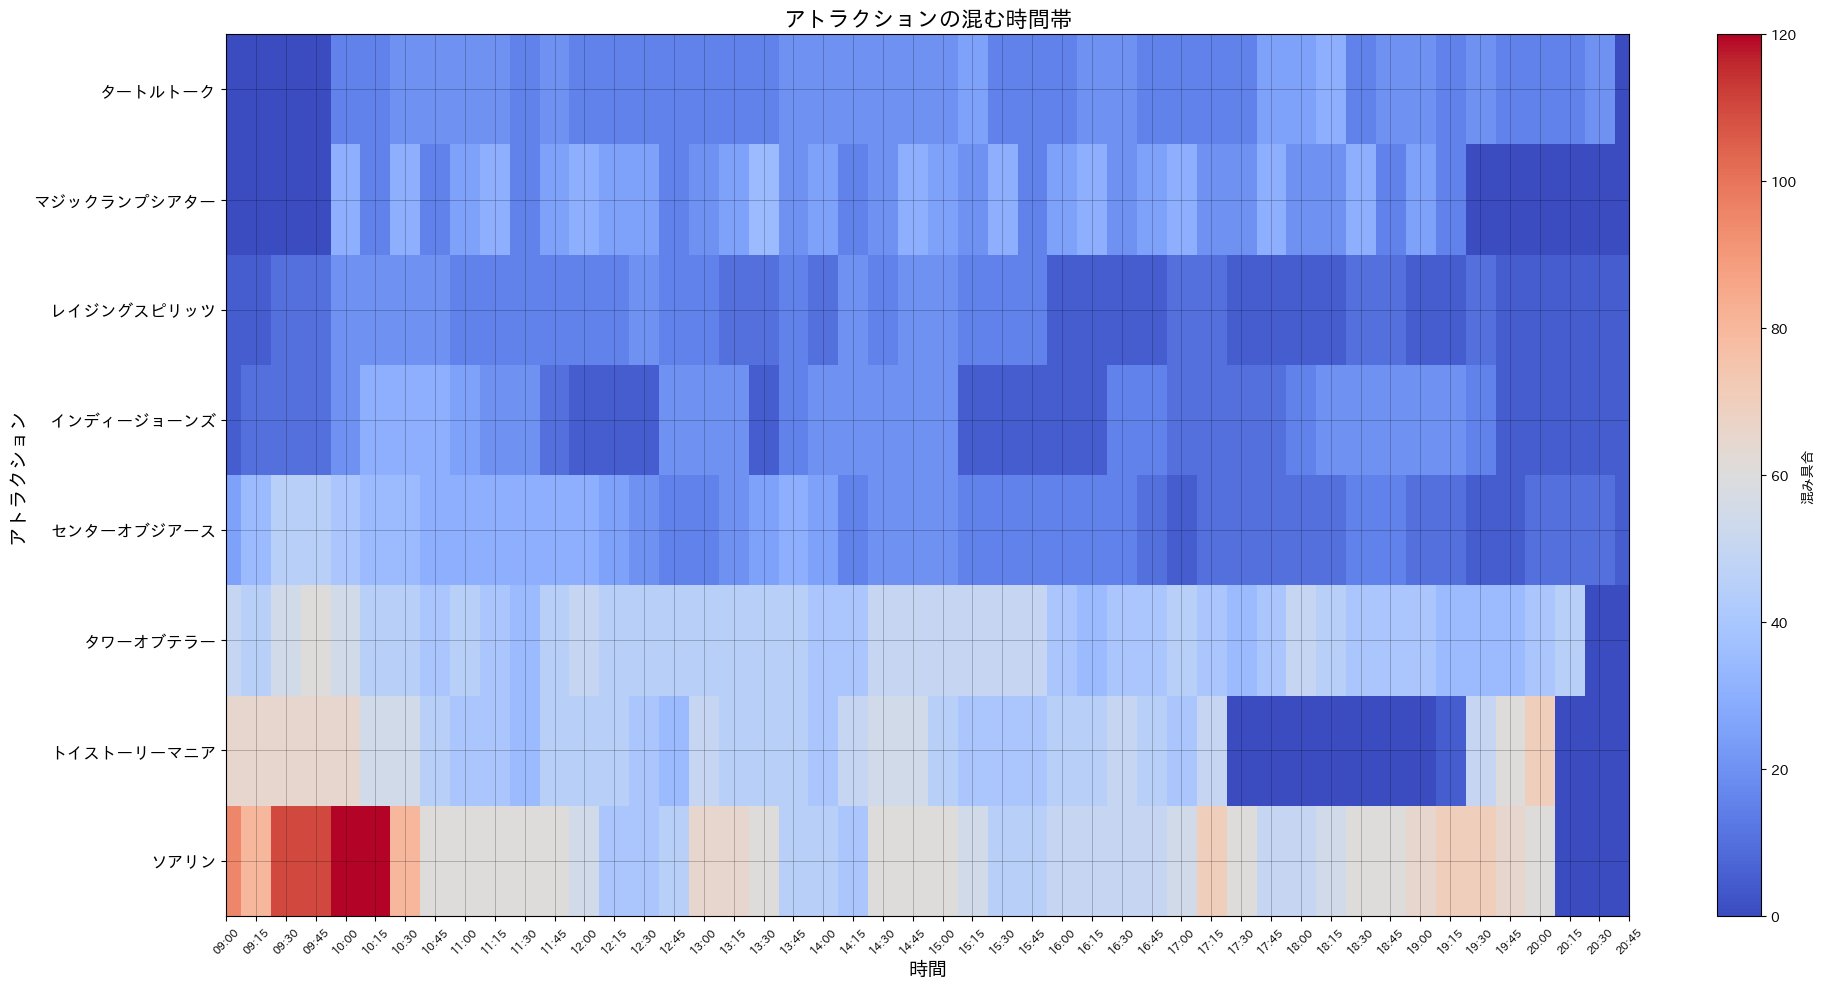

In [17]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = './waittime_heatmap_csv/2022-07-01_waittime.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# 不要な列を削除する
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# データを数値に変換
df = df.apply(pd.to_numeric, errors='coerce')

# ヒートマップデータの初期化
heatmap_data = df.values  # データフレームの値を取得

# プロットの準備
plt.figure(figsize=(20, 10))  # 図全体のサイズを大きく設定（幅20、高さ10）

# ヒートマップを表示
norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=1.0)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
attractions = ['ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 'センターオブジアース',
               'インディージョーンズ', 'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク']
plt.yticks(np.arange(len(attractions)), attractions, fontsize=12)  # フォントサイズを調整

# x軸ラベル設定 (9:00~21:00の15分ごとに設定)
x_ticks = np.arange(len(df.columns))  # 各列のインデックスをx軸ラベルとして使用
x_labels = [f"{(int(t) // 60) + 9:02}:{(int(t) % 60):02}" for t in df.columns]  # 9:00から始まる時間
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# x軸の範囲を設定 (9:00から21:00)
plt.xlim(0, len(x_ticks) - 1)

# y軸の範囲を設定
plt.ylim(-0.5, len(attractions) - 0.5)

# グラフの設定
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの混む時間帯", fontsize=16)

# カラーバーの追加
cbar = plt.colorbar(cax, label='混み具合')
cbar.ax.tick_params(labelsize=10)

# 図を表示
plt.tight_layout()
plt.show()

### 時間別アトラクションの乗車数

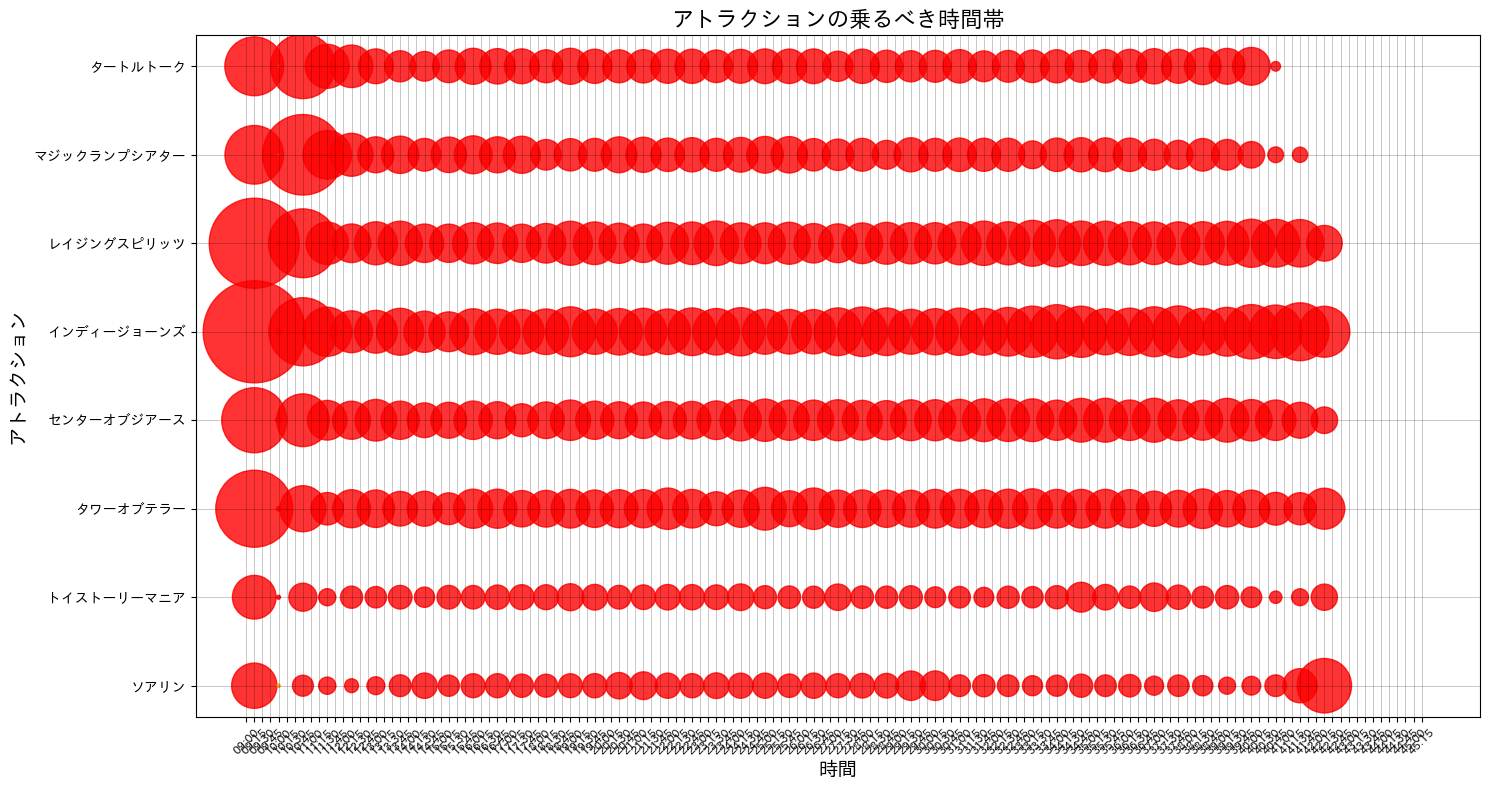

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_file = 'attraction_heatmap.csv'  # 実際のCSVファイル名に置き換えてください
df = pd.read_csv(csv_file)  # データフレームの読み込み

# データを数値型に変換し、無効な値をNaNに変換
df = df.apply(pd.to_numeric, errors='coerce')

# アトラクション名の辞書
attractions = {
    0: 'ソアリン',
    1: 'トイストーリーマニア',
    2: 'タワーオブテラー',
    3: 'センターオブジアース',
    4: 'インディージョーンズ',
    5: 'レイジングスピリッツ',
    6: 'マジックランプシアター',
    7: 'タートルトーク'
}

# 散布図用のプロット設定
plt.figure(figsize=(15, 8))

# 各アトラクションの時間帯と頻度に基づいて散布図を作成
for i, attraction in enumerate(attractions.values()):
    # アトラクションごとの時間帯と頻度を取得
    y = np.repeat(i, df.shape[1])  # y座標はアトラクションのインデックス
    x = np.arange(df.shape[1])  # x座標は時間帯のインデックス
    frequency = df.iloc[i].values  # 乗るべき頻度データを取得
    
    # NaNを除外
    valid_mask = ~np.isnan(frequency)

    # 各頻度をグループ分け（ここでは5段階に分ける例）
    color_map = {
        0: 'grey',      # 無視
        1: 'lightgreen',# 低
        2: 'yellow',    # 中
        3: 'orange',    # 高
        4: 'red'        # 非常に高
    }
    
    # 精度を色にマッピング（ここで0-4に制限）
    clipped_frequency = np.clip(frequency[valid_mask], 0, 4)  # 0から4の範囲にクリップ
    colors = [color_map[int(val)] for val in clipped_frequency]

    # サイズを頻度に基づいて設定（調整済み）
    sizes = [val * 2 for val in frequency[valid_mask]]  # サイズを頻度の2倍に設定

    plt.scatter(x[valid_mask], y[valid_mask], c=colors, s=sizes, alpha=0.8, label=attraction)  # 各アトラクションごとにラベルを設定

# x軸ラベル設定 (9:00~21:00の15分ごと)
x_ticks = np.arange(0, df.shape[1], 1)  # 列数に基づくx軸の範囲
x_labels = [f"{9 + (i // 4):02}:{(i % 4) * 15:02}" for i in range(df.shape[1])]  # 15分ごと

plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)

# y軸の設定 (アトラクション名をy軸ラベルとして使用)
plt.yticks(np.arange(len(attractions)), list(attractions.values()))

# グラフの設定
plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの乗るべき時間帯", fontsize=16)
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.3)  # グリッドの透明度を設定

# 図を表示
plt.tight_layout()
plt.show()
